In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(42)

from pprint import pprint

In [11]:
## Dataset

# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [12]:
## EDA

# 1. Dimensions
# 2. Data Types
# 3. Missing Values
# 4. Basic Statistics
# 5. Outliers

In [14]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [16]:
_d = {
    "<=50K" : 1,
    "<=50K." : 1,
    ">50K" : 0,
    ">50K." : 0
}

target = y["income"].map(_d)

In [18]:
X.shape

(48842, 14)

In [19]:
X.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [20]:
X.isnull().mean() * 100

age               0.000000
workclass         1.971664
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        1.977806
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.560993
dtype: float64

In [21]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


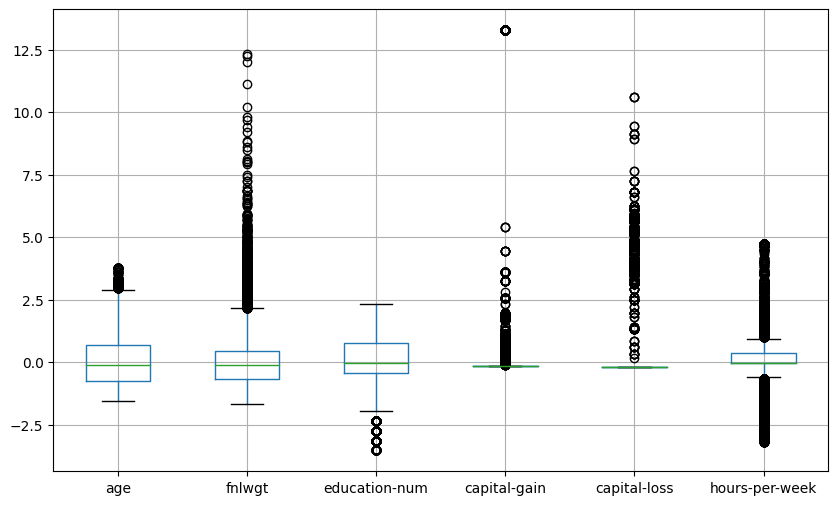

In [25]:
# Standardize 
numeric_fields = X.select_dtypes(include=["number"]).columns
X_std = (X[numeric_fields] - X[numeric_fields].mean()) / X[numeric_fields].std()

X_std.boxplot(figsize=(10, 6))
plt.show()

In [27]:
X = X.dropna()
X_std = (X[numeric_fields] - X[numeric_fields].mean()) / X[numeric_fields].std()

In [30]:
# Outliers

outliers = {}
for col in numeric_fields:

   # print(X_std[col].mean())
    print(X_std[col].std())
    # z_scores = np.abs((X_std[col] - X_std[col].mean()) / X_std.std())
    # print(z_scores)

0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
